In [10]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import quad
from scipy.misc import derivative
import matplotlib.pyplot as plt
from functools import partial

In [11]:
h = 1e-2
dx = 1e-6
a = 2

In [12]:
def V(x):
    return x**2*(np.pi + np.arctan(x))

def H(x, p):
    return p**2/2 + V(x)

def Hp(x, p):
    return p

def ode(t, y):
    x, p, Phi = y[0], y[1], y[2]

    return [
        p, 
        -2*x*(np.pi+np.arctan(x)) - x**2/(1+x**2),
        p*Hp(p, x) - H(p, x)
    ]

In [13]:
def p(alpha):
    return a  # On initial surface (t=0) p is const and equals a

def X(alpha, t):
    x_0 = alpha
    p_0 = a
    Phi_0 = 0  # Because of t = 0
    t_span = [0, t]
    sol = solve_ivp(ode, t_span, [x_0, p_0, Phi_0], t_eval=[t])

    return sol.y[0][0]

def Phi(alpha, t):
    x_0 = alpha
    p_0 = a
    Phi_0 = 0  # Because of t = 0
    t_span = [0, t]
    sol = solve_ivp(ode, t_span, [x_0, p_0, Phi_0], t_eval=[t])

    return sol.y[2][0]

def J(alpha, t):
    X_halfed = partial(X, t=t)
    return np.abs(derivative(X_halfed, alpha, dx=dx))

def S(alpha, t):
    return quad(lambda a: p(a) * J(a, t), 0, alpha)[0]

In [14]:
def psi(i, t):
    # i - index in alphas and xs arrays
    mu_t = 0
    m_n = 0
    A = 1
    x = xs[i]  # Formally it is useless
    a = alphas[i]
    
    return np.exp(1j/h*Phi(a, t) + 1j*np.pi/2*(mu_t - m_n)) * A/np.sqrt(J(a, t)) * np.exp(1j/h*S(a, t))

In [ ]:
t = 0.4
alphas = np.linspace(-2, 2, 10)
xs = [X(a, t) for a in alphas]

*
*
*
*
*
*
*
*
*
*


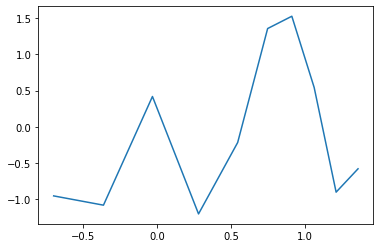

In [18]:
psis = []
for i, _ in enumerate(xs):
    P = psi(i, t)
    print('*')
    psis.append(P)
    
plt.plot(xs, psis)

In [19]:
xs

[-0.7017094086052296,
 -0.36441063386011596,
 -0.03255100493734966,
 0.2796178065130992,
 0.5447535682174409,
 0.7477562860074496,
 0.911600917046485,
 1.0628853550310915,
 1.2116054730900703,
 1.3600582839286555]

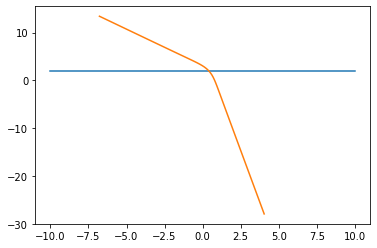

In [17]:
# Вращение лагранжевой поверхности в зависимости от времени
rks = []
for x in xs:
    x_0 = x
    p_0 = a
    Phi_0 = 0
    t_span = [0, t]
    sol = solve_ivp(ode, t_span, [x_0, p_0, Phi_0], t_eval=[t])
    rks.append([sol.y[0][0], sol.y[1][0]])
    
plt.plot(xs, [a for _ in xs])
plt.plot([pair[0] for pair in rks], [pair[1] for pair in rks])